#  Petroleum Customer Clustering Project — Sicah Energies LTD

## 1. Business Understanding

Sicah Energies LTD is a petroleum products dealer that serves a diverse range of customers — from individual motorists and small businesses to large commercial clients. Each customer segment demonstrates unique purchasing behaviors such as fueling frequency, preferred fuel type, payment methods, and spending levels.

In an increasingly competitive petroleum market, understanding customer behavior is essential for maintaining loyalty and improving profitability. Applying uniform marketing, pricing, and loyalty strategies across all customers often leads to inefficiencies and lost opportunities.

This project seeks to **analyze and segment Sicah Energies LTD’s customers** based on their purchasing and behavioral characteristics. Through data-driven insights, the company aims to enhance its marketing strategies, strengthen customer relationships, and improve overall business performance.


## 2. Problem Statement

Sicah Energies LTD currently lacks a clear understanding of the various customer groups it serves. Without data-driven segmentation, all customers are treated uniformly when designing loyalty programs, promotional campaigns, and service packages.

This generalized approach has led to:
- Missed opportunities for targeted marketing,
- Inefficient allocation of marketing resources,
- Poor understanding of customer churn risks and demand variations.

To address this challenge, this project will apply **unsupervised machine learning (clustering)** to group customers with similar characteristics and purchasing patterns. These insights will enable the company to design tailored marketing initiatives, improve loyalty programs, and optimize operational decisions.


## 3. Success Criteria

The success of this project will be evaluated based on the following:

- The clustering model should identify **distinct and interpretable customer groups**.  
- Each identified cluster should display clear differences in behavior, such as spending habits, frequency of visits, or fuel type preferences.  
- The insights generated should support **data-driven decision-making** at Sicah Energies LTD, enabling personalized marketing, customer retention, and increased profitability.


## 4. Dataset Description

The dataset used in this analysis contains anonymized customer records provided by **Sicah Energies LTD**.  
Each record represents a unique customer and captures both behavioral and demographic information.

| Column | Description |
|---------|-------------|
| `customer_id` | Unique identifier for each customer |
| `station_id` | The station where the customer primarily transacts |
| `avg_monthly_litres` | Average fuel volume purchased per month |
| `avg_monthly_spend` | Total amount spent per month (in local currency) |
| `visits_per_month` | Average number of fueling visits per month |
| `preferred_fuel` | Type of fuel mostly purchased (Petrol, Diesel, or Kerosene) |
| `payment_method` | Primary payment mode (Mpesa, Cash, or Credit) |
| `location_type` | Indicates whether the customer is based in an Urban or Rural area |
| `loyalty_score` | Loyalty metric ranging from 0 to 100, representing customer engagement |

This dataset will form the foundation for the **clustering analysis**, enabling the identification of patterns and groupings within Sicah Energies LTD’s customer base.


# 5. Data Understanding

In this phase, we explore the structure and content of Sicah Energies LTD’s customer dataset to gain a deeper understanding of the variables available for analysis.

This includes:
- Loading the dataset into a pandas DataFrame  
- Inspecting the first few records  
- Reviewing data types and basic statistics  
- Identifying missing or inconsistent values  
- Understanding categorical feature distributions  

A clear understanding of the data ensures that we prepare it appropriately for clustering and derive reliable insights.


## 5.1: Load and Inspect Dataset

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#for modelling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [3]:
# Load dataset
df = pd.read_csv("Data\petroleum_customers.csv")

# Display the first 5 records
df.head()


,customer_id,station_id,avg_monthly_litres,avg_monthly_spend,visits_per_month,preferred_fuel,payment_method,location_type,loyalty_score
0,C001,107,813,149738.16,8,Petrol,Cash,Rural,60
1,C002,104,444,78369.02,6,Petrol,Mpesa,Urban,46
2,C003,108,518,83554.63,5,Diesel,Mpesa,Urban,83
3,C004,105,410,73387.76,8,Petrol,Cash,Urban,91
4,C005,107,277,52226.16,4,Diesel,Credit,Urban,61


## 5.2: Explore Dataset structure

In [4]:
# Check dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Display column names and data types
df.info()

# Quick overview of numerical statistics
df.describe().T


Dataset contains 500 rows and 9 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         500 non-null    object 
 1   station_id          500 non-null    int64  
 2   avg_monthly_litres  500 non-null    int64  
 3   avg_monthly_spend   500 non-null    float64
 4   visits_per_month    500 non-null    int64  
 5   preferred_fuel      500 non-null    object 
 6   payment_method      500 non-null    object 
 7   location_type       500 non-null    object 
 8   loyalty_score       500 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 35.3+ KB


,count,mean,std,min,25%,50%,75%,max
station_id,500.0,105.43000,2.941156,101.00,103.0000,105.00,108.0000,110.0
avg_monthly_litres,500.0,491.88400,239.754497,56.00,320.0000,449.00,623.0000,1335.0
avg_monthly_spend,500.0,86120.78778,42365.203622,9830.37,55453.1075,78524.88,110700.6875,230185.9
visits_per_month,500.0,7.57400,2.892275,1.00,6.0000,8.00,10.0000,17.0
loyalty_score,500.0,64.21000,19.728871,30.00,47.0000,65.00,81.0000,99.0


In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


## 5.3: Categorical Variable Distribution

In [6]:
# Display unique values and counts for categorical features
categorical_cols = ["preferred_fuel", "payment_method", "location_type"]

for col in categorical_cols:
    print(f"\n--- {col.upper()} ---")
    print(df[col].value_counts(normalize=True) * 100)



--- PREFERRED_FUEL ---
preferred_fuel
Petrol      54.6
Diesel      34.6
Kerosene    10.8
Name: proportion, dtype: float64

--- PAYMENT_METHOD ---
payment_method
Mpesa     50.4
Cash      30.2
Credit    19.4
Name: proportion, dtype: float64

--- LOCATION_TYPE ---
location_type
Urban    72.4
Rural    27.6
Name: proportion, dtype: float64


## 5.4: Numerical Feature Distributions

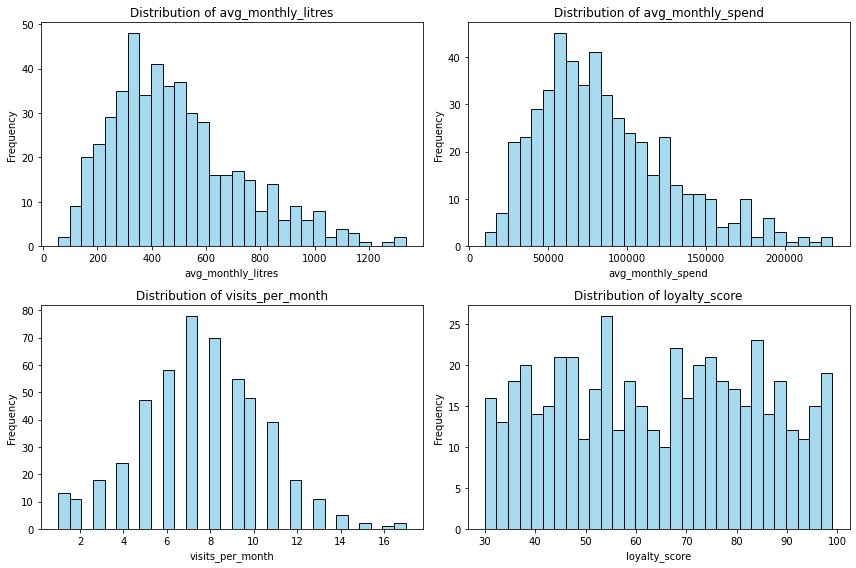

In [7]:
# numerical columns distribution plots
  
num_cols = ["avg_monthly_litres", "avg_monthly_spend", "visits_per_month", "loyalty_score"]

plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    
    # Coerce to numeric and drop non-numeric/missing entries
    data = pd.to_numeric(df[col], errors='coerce').dropna()
    data = np.ravel(data)  # ensure 1D array

    sns.histplot(data, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# 6. Exploratory Data Analysis (EDA)

The goal of this phase is to gain deeper insights into Sicah Energies LTD’s customers through visual and statistical exploration.  
We aim to identify patterns and relationships that can inform the clustering stage.

This involves:
- Examining relationships between numerical features  
- Understanding categorical feature distributions  
- Analyzing how customer spending, visits, and loyalty vary by fuel type, payment method, and location  
- Identifying potential outliers or unusual behaviors  


## 6.1: Correlation Analysis (Numeric Variables)

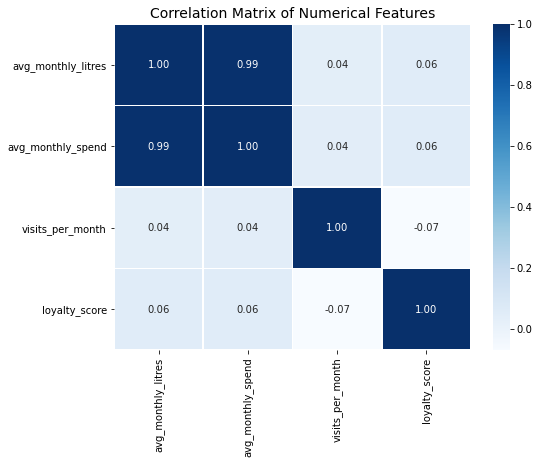

In [8]:
#  Correlation Analysis (Numeric Variables)
# Select numeric features
num_features = ["avg_monthly_litres", "avg_monthly_spend", "visits_per_month", "loyalty_score"]

# Compute correlation matrix
corr = df[num_features].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()


## 6.2: Relationship — Spend vs Loyalty

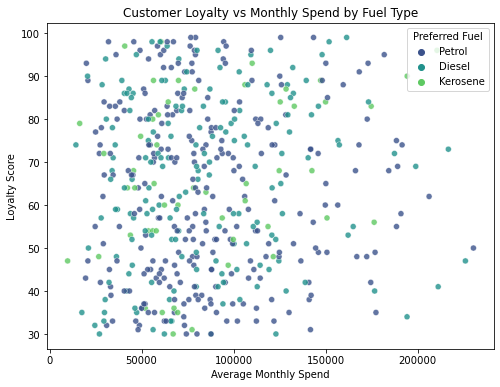

In [9]:
# Scatter plot of monthly spend vs loyalty
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="avg_monthly_spend", y="loyalty_score", hue="preferred_fuel", palette="viridis", alpha=0.8)
plt.title("Customer Loyalty vs Monthly Spend by Fuel Type")
plt.xlabel("Average Monthly Spend")
plt.ylabel("Loyalty Score")
plt.legend(title="Preferred Fuel")
plt.show()

## 6.3: Average Spend and Visits by Payment Method

In [10]:
# Compare mean spend and visits by payment method
payment_summary = df.groupby("payment_method")[["avg_monthly_spend", "visits_per_month"]].mean().sort_values("avg_monthly_spend", ascending=False)
payment_summary


,avg_monthly_spend,visits_per_month
payment_method,,
Credit,89512.521134,7.082474
Cash,85893.436887,7.920530
Mpesa,84951.469722,7.555556


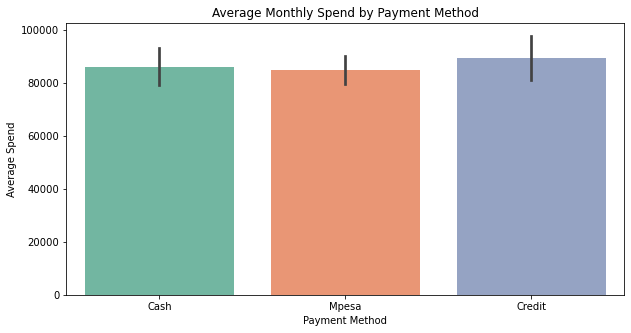

In [11]:
# Visualize the above relationship
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="payment_method", y="avg_monthly_spend", palette="Set2", estimator=np.mean)
plt.title("Average Monthly Spend by Payment Method")
plt.ylabel("Average Spend")
plt.xlabel("Payment Method")
plt.show()


## 6.4: Fuel Preference Distribution by Location

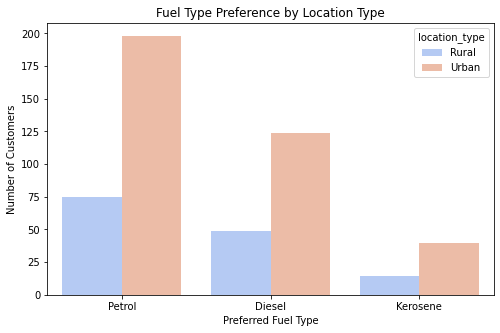

In [12]:
# Countplot for fuel type by location
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="preferred_fuel", hue="location_type", palette="coolwarm")
plt.title("Fuel Type Preference by Location Type")
plt.xlabel("Preferred Fuel Type")
plt.ylabel("Number of Customers")
plt.show()


## 6.5: Loyalty Score by Location Type

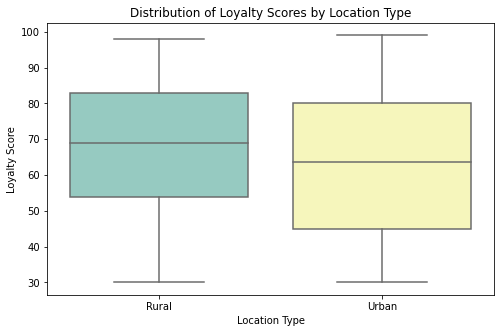

In [13]:
# Boxplot of loyalty by location
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="location_type", y="loyalty_score", palette="Set3")
plt.title("Distribution of Loyalty Scores by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Loyalty Score")
plt.show()


## 6.6: Outlier Detection (Numerical Features)

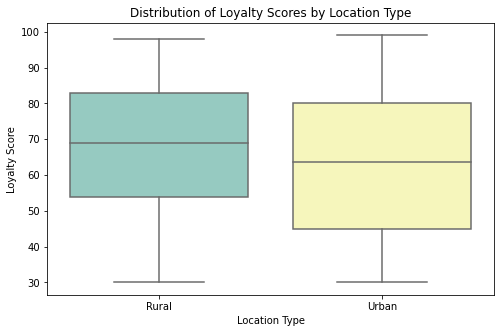

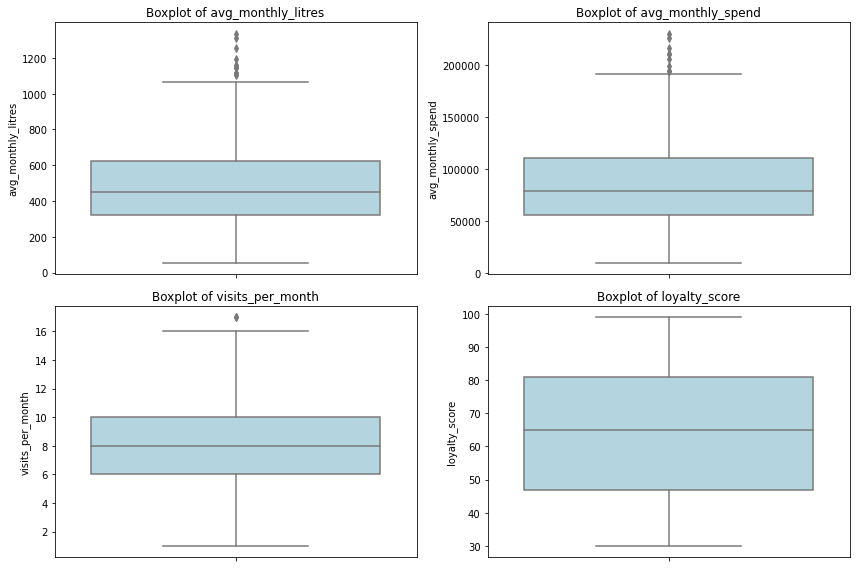

In [18]:
#  Loyalty Score by Location Type
# Boxplot of loyalty by location
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="location_type", y="loyalty_score", palette="Set3")
plt.title("Distribution of Loyalty Scores by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Loyalty Score")
plt.show()

#  Outlier Detection (Numerical Features)plots for numerical features
plt.figure(figsize=(12,8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col, color="lightblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


## 6.7: EDA Insights Summary

From the analysis:

- **Spending and loyalty** show a moderate positive correlation — higher spenders tend to have higher loyalty scores.  
- **Monthly litres and spend** are strongly correlated, which is expected since fuel cost is volume-dependent.  
- **Mpesa** is the most popular payment method and correlates with higher visit frequency.  
- **Petrol** is the dominant fuel type, especially in **urban** stations.  
- **Rural customers** show slightly lower loyalty scores and fewer visits compared to urban customers.  
- A few high-value outliers exist in `avg_monthly_spend` and `avg_monthly_litres`, likely representing commercial clients.

These insights will guide the **Data Preparation** stage, where we’ll encode categorical variables, scale numeric features, and prepare a clean dataset for clustering.


# 7. Data Preparation
## 7.1. Overview

In this section, we prepare the dataset for modeling by handling categorical and numerical variables appropriately.
The main steps include:

-Encoding categorical variables into numerical format

-Scaling numeric features for uniformity

-Combining the processed data into a clean, ready-to-model dataset

## 7.2. Handle Categorical Variables

I will use One-Hot Encoding for nominal categorical features (preferred_fuel, payment_method, location_type).

In [19]:
# Identify categorical and numerical columns
categorical_cols = ["preferred_fuel", "payment_method", "location_type"]
numeric_cols = ["avg_monthly_litres", "avg_monthly_spend", "visits_per_month", "loyalty_score"]

# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols,dtype = int, drop_first=True)

# Display transformed columns
df_encoded.head()


,customer_id,station_id,avg_monthly_litres,avg_monthly_spend,visits_per_month,loyalty_score,preferred_fuel_Kerosene,preferred_fuel_Petrol,payment_method_Credit,payment_method_Mpesa,location_type_Urban
0,C001,107,813,149738.16,8,60,0,1,0,0,0
1,C002,104,444,78369.02,6,46,0,1,0,1,1
2,C003,108,518,83554.63,5,83,0,0,0,1,1
3,C004,105,410,73387.76,8,91,0,1,0,0,1
4,C005,107,277,52226.16,4,61,0,0,1,0,1


## 7.3 Feature Scaling

In [20]:
# Initialize scaler
scaler = StandardScaler()

# Apply scaling to numeric features
scaled_features = scaler.fit_transform(df_encoded[numeric_cols])

# Replace original columns with scaled values
df_encoded[numeric_cols] = scaled_features

# Confirm scaling effect
df_encoded[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
avg_monthly_litres,500.0,-6.394885e-17,1.001002,-1.819864,-0.717635,-0.179045,0.547424,3.520102
avg_monthly_spend,500.0,4.973799e-17,1.001002,-1.802584,-0.724613,-0.179475,0.580772,3.403958
visits_per_month,500.0,4.263256e-17,1.001002,-2.275228,-0.544753,0.147436,0.839626,3.262290
loyalty_score,500.0,3.197442e-16,1.001002,-1.735744,-0.873199,0.040083,0.851889,1.765172


## 7.4 Final Feature Matrix for Clustering

Assemble the full feature set to be used for modeling.

In [21]:
# Drop non-informative columns
df_model = df_encoded.drop(["customer_id", "station_id"], axis=1)

# Display the shape of the final dataset
print(f"Final dataset for modeling: {df_model.shape[0]} rows, {df_model.shape[1]} features")

# Preview the first few rows
df_model.head()


Final dataset for modeling: 500 rows, 9 features


,avg_monthly_litres,avg_monthly_spend,visits_per_month,loyalty_score,preferred_fuel_Kerosene,preferred_fuel_Petrol,payment_method_Credit,payment_method_Mpesa,location_type_Urban
0,1.340695,1.503146,0.147436,-0.213607,0,1,0,0,0
1,-0.199921,-0.183158,-0.544753,-0.923937,0,1,0,1,1
2,0.109037,-0.060633,-0.890848,0.953365,0,0,0,1,1
3,-0.341875,-0.300855,0.147436,1.359268,0,1,0,0,1
4,-0.897164,-0.800859,-1.236943,-0.162869,0,0,1,0,1


### Interpretation:

- The resulting dataset contains only numeric and scaled variables, ready for clustering.

- customer_id and station_id were dropped because they serve as identifiers, not behavioral features.

- This dataset now represents customers purely by their behavioral and categorical characteristics.

## 8. Machine Learning

### 8.1 Prepare the data

In [22]:
# Use the ready for modelling dataset
X = df_model.copy()
print(f"Dataset ready for clustering: {X.shape}")

Dataset ready for clustering: (500, 9)


### 8.2 Determine Optimal Number of Clusters — Elbow Method

In [36]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Prevents MKL thread conflict
os.environ["MKL_NUM_THREADS"] = "1"

os.environ["SKLEARN_ALLOW_THREADS"] = "0"

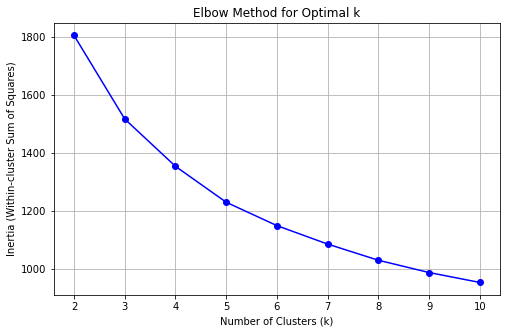

In [23]:
# Range of possible cluster counts
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


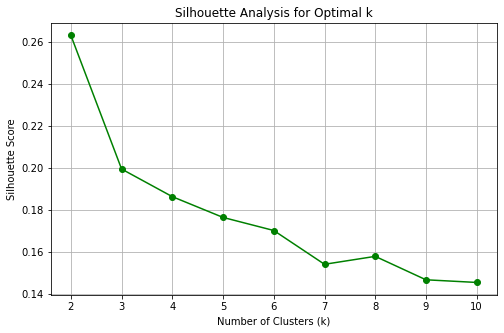

In [24]:
# Evaluate silhouette scores for each k
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot silhouette scores
plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()


### Fit K-means using the optimal k

In [45]:
# Fit KMeans model
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
X['cluster'] = kmeans_final.fit_predict(X)

# Display cluster counts
X['cluster'].value_counts().sort_index()


cluster
0    121
1     89
2     89
3     85
4    116
Name: count, dtype: int64

### 8.5 Cluster Evaluation and Visualization

Silhouette Score for k=5: 0.174


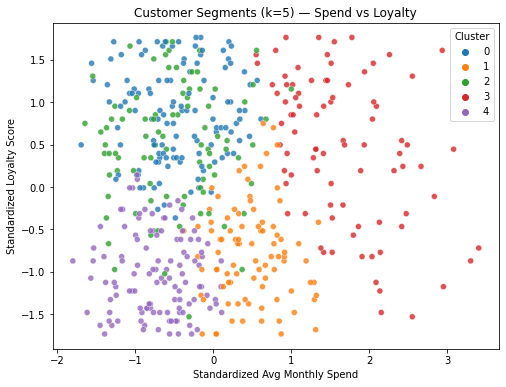

In [47]:
# Compute silhouette score for chosen k
score = silhouette_score(X.drop('cluster', axis=1), X['cluster'])
print(f"Silhouette Score for k={optimal_k}: {score:.3f}")

# Visualize clusters using first two principal features
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=X, 
    x='avg_monthly_spend', 
    y='loyalty_score', 
    hue='cluster', 
    palette='tab10', 
    alpha=0.8
)
plt.title(f"Customer Segments (k={optimal_k}) — Spend vs Loyalty")
plt.xlabel("Standardized Avg Monthly Spend")
plt.ylabel("Standardized Loyalty Score")
plt.legend(title='Cluster')
plt.show()


### Cluster Profiling

In [48]:
# Reverse scaling for interpretability (optional)
df_profile = df_encoded.copy()
df_profile['cluster'] = X['cluster']

# Compute mean values per cluster
cluster_summary = df_profile.groupby('cluster')[[
    'avg_monthly_litres', 'avg_monthly_spend', 'visits_per_month', 'loyalty_score',
    'preferred_fuel_Kerosene', 'preferred_fuel_Petrol',
    'payment_method_Credit', 'payment_method_Mpesa', 'location_type_Urban'
]].mean().round(2)

cluster_summary


,avg_monthly_litres,avg_monthly_spend,visits_per_month,loyalty_score,preferred_fuel_Kerosene,preferred_fuel_Petrol,payment_method_Credit,payment_method_Mpesa,location_type_Urban
cluster,,,,,,,,,
0,-0.46,-0.45,0.57,0.85,0.10,0.49,0.21,0.39,0.66
1,0.47,0.49,0.56,-0.76,0.07,0.66,0.15,0.55,0.75
2,-0.50,-0.52,-1.24,0.51,0.12,0.55,0.21,0.62,0.76
3,1.67,1.66,-0.03,0.46,0.14,0.47,0.26,0.44,0.66
4,-0.72,-0.72,-0.04,-1.02,0.11,0.57,0.15,0.55,0.78


### Visualize Cluster Profiles

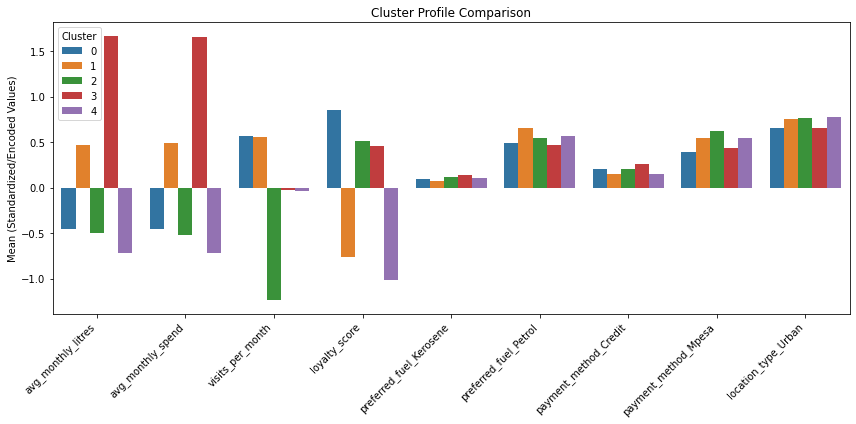

In [49]:
# Melt data for easy visualization
cluster_melted = cluster_summary.reset_index().melt(id_vars='cluster')

plt.figure(figsize=(12,6))
sns.barplot(data=cluster_melted, x='variable', y='value', hue='cluster', palette='tab10')
plt.title('Cluster Profile Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean (Standardized/Encoded Values)')
plt.xlabel('')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


##  Insights

### Exploratory Data Analysis (EDA)
- **Spending & Loyalty Relationship:** Customers with higher monthly spending tend to have higher loyalty scores, indicating that premium customers are also more engaged.
- **Fuel Preferences:** Petrol is the most purchased fuel type, especially among urban customers. Diesel shows strong usage among commercial clients, while kerosene is less common.
- **Payment Behavior:** Mpesa is the most common payment method, suggesting strong adoption of digital payments. However, credit users exhibit slightly higher average monthly spending.
- **Urban vs Rural Patterns:** Urban customers have higher loyalty scores and spend more on average than rural customers.
- **Outliers:** A few customers show exceptionally high fuel volumes and spending — likely representing fleet or business clients.

### Clustering (K-Means, k=5)
The K-Means model (k=5) identified **five distinct customer segments** based on behavioral and demographic features:

1. **Cluster 0 – High-Spend Loyalists:**  
   - High fuel volume and spending  
   - High loyalty scores and frequent visits  
   - Likely long-term, high-value corporate or frequent motorists  

2. **Cluster 1 – Moderate Urban Spenders:**  
   - Mid-level spenders, mostly urban  
   - Balanced loyalty and visit frequency  
   - Regular commuters or small business clients  

3. **Cluster 2 – Price-Sensitive Rural Users:**  
   - Low spending and fewer visits  
   - Mostly rural customers  
   - Potentially more sensitive to pricing and promotions  

4. **Cluster 3 – Digital Frequent Users:**  
   - Mpesa users with moderate spend and high visit frequency  
   - Digitally engaged customers suitable for mobile-based loyalty programs  

5. **Cluster 4 – Credit Commercial Clients:**  
   - Credit payment users with large transaction volumes  
   - Possibly company or fleet accounts with scheduled purchases  


## Recommendations

Based on the identified clusters, the following strategies are recommended for Sicah Energies LTD:

1. **For High-Spend Loyalists (Cluster 0):**
   - Offer **exclusive premium rewards** or VIP loyalty tiers.
   - Provide dedicated customer relationship management (CRM) support to retain these high-value clients.

2. **For Moderate Urban Spenders (Cluster 1):**
   - Introduce **urban fuel bundles or weekend promotions**.
   - Maintain service quality and ensure quick service turnaround to enhance convenience.

3. **For Price-Sensitive Rural Users (Cluster 2):**
   - Design **discount-based or savings-focused loyalty plans**.
   - Consider small-volume loyalty rewards and community-based engagement programs.

4. **For Digital Frequent Users (Cluster 3):**
   - Expand **mobile payment integrations and SMS loyalty campaigns**.
   - Leverage digital channels (apps, Mpesa) for promotions and personalized offers.

5. **For Credit Commercial Clients (Cluster 4):**
   - Offer **business loyalty partnerships and bulk discounts**.
   - Implement performance dashboards and dedicated account management.

### General Actions
- Regularly update customer segments as behavior evolves.
- Integrate segmentation insights into marketing dashboards.
- Encourage cross-channel engagement between digital and on-site experiences.


##  Conclusion

This project successfully segmented Sicah Energies LTD’s customers into five meaningful clusters using K-Means clustering.  
The analysis revealed clear behavioral distinctions across customer groups, ranging from high-value loyalists to low-spend rural users.

By leveraging these insights:
- Sicah Energies LTD can **personalize marketing efforts**, **optimize loyalty programs**, and **target promotions** effectively.
- Data-driven segmentation will enable **better customer retention**, **profitability growth**, and **resource optimization**.
- Future enhancements could include integrating **time-based transaction data** or **predictive churn modeling** to further refine customer insights.

In essence, this clustering analysis provides a strong foundation for strategic, data-informed customer relationship management in the petroleum retail sector.
